In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from src.data_utils import *
from statsmodels.nonparametric.smoothers_lowess import lowess

In [11]:
df = pd.read_csv('../data/raw/N_seaice_extent_daily_v3.0.csv')
df = df.iloc[1:,:]

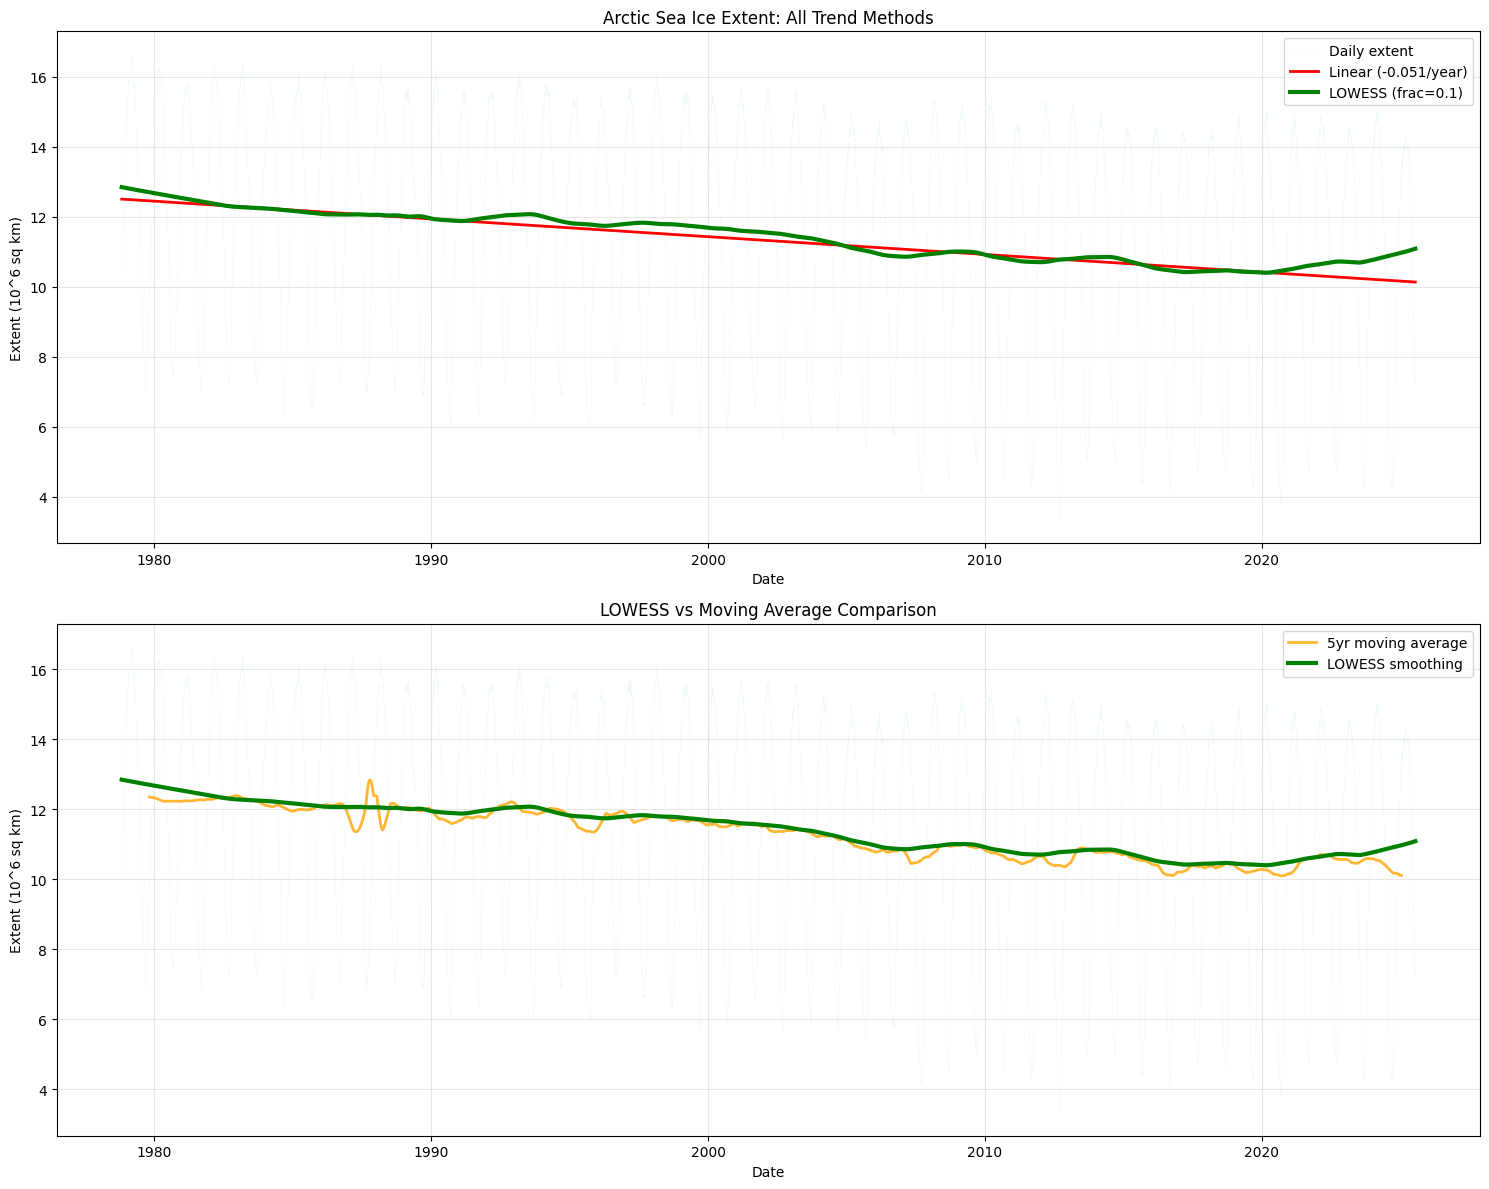

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from src.data_utils import *

df = pd.read_csv('../data/raw/N_seaice_extent_daily_v3.0.csv')
df = df.iloc[1:,:]

df.columns = df.columns.str.strip()
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)
df['Extent'] = pd.to_numeric(df['Extent'], errors='coerce')
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

df = df.dropna(subset=['Extent'])
df = df.sort_values('Date')

df['Date_numeric'] = (df['Date'] - df['Date'].min()).dt.days

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Date_numeric'], df['Extent'])
linear_trend = slope * df['Date_numeric'] + intercept

df['Moving_Avg_365'] = df['Extent'].rolling(window=365, center=True).mean()

lowess_result = lowess(df['Extent'], df['Date_numeric'], frac=0.1, return_sorted=False)
df['LOWESS_smooth'] = lowess_result

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Top plot: All trends together
ax1.plot(df['Date'], df['Extent'], alpha=0.2, linewidth=0.3, color='lightblue',
         label='Daily extent')
ax1.plot(df['Date'], linear_trend, color='red', linewidth=2,
         label=f'Linear ({slope*365.25:.3f}/year)')
ax1.plot(df['Date'], df['LOWESS_smooth'], color='green', linewidth=3,
         label='LOWESS (frac=0.1)')

ax1.set_title('Arctic Sea Ice Extent: All Trend Methods')
ax1.set_xlabel('Date')
ax1.set_ylabel('Extent (10^6 sq km)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bottom plot: Focus on LOWESS vs Moving Average
ax2.plot(df['Date'], df['Extent'], alpha=0.2, linewidth=0.3, color='lightblue')
ax2.plot(df['Date'], df['Moving_Avg_365'], color='orange', linewidth=2,
         label='5yr moving average', alpha=0.8)
ax2.plot(df['Date'], df['LOWESS_smooth'], color='green', linewidth=3,
         label='LOWESS smoothing')

ax2.set_title('LOWESS vs Moving Average Comparison')
ax2.set_xlabel('Date')
ax2.set_ylabel('Extent (10^6 sq km)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Creating a basic lstm

